## Module 5 Homework Assignment
_Megan Walker-Radtke_

1. Split the data into a 70-30 split for training and testing data.

2. Using the split created in (1), train a multiple linear regression dataset using the training dataset, and validate it using the testing dataset.  Compare the $R^2$ and root mean square errors of model on the training and testing sets to a baseline prediction of rain rate using the formula $Z = 200 R^{1.6}$.

3. Repeat 1 doing a grid search over polynomial orders, using a grid search over orders 0-9, and use cross-validation of 7 folds.  For the best polynomial model in terms of $R^2$, does it outperform the baseline and the linear regression model in terms of $R^2$ and root mean square error?

4. Repeat 1 with a Random Forest Regressor, and perform a grid_search on the following parameters:
   
   ```python
   param_grid = {
    "bootstrap": [True, False],
    "max_depth": [10, 100],
    "max_features": ["sqrt", 1.0],  
    "min_samples_leaf": [1, 4],
    "min_samples_split": [2, 10],
    "n_estimators": [200, 1000]}
   ```
  Can you beat the baseline, or the linear regression, or best polynomial model with the best optimized Random Forest Regressor in terms of $R^2$ and root mean square error?

In [ ]:
# Import necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
# Read in radar data and examine the first few rows
radar = pd.read_csv('homework/radar_parameters.csv')
radar.head()

,Unnamed: 0,Zh (dBZ),Zdr (dB),Ldr (dB),Kdp (deg km-1),Ah (dBZ/km),Adr (dB/km),R (mm/hr)
0,0,23.144878,0.418637,-41.757733,0.005395,0.000290,0.000012,2.393520
1,1,22.737156,0.322850,-43.772069,0.005194,0.000360,0.000012,3.502699
2,2,26.869826,0.330948,-43.577399,0.013385,0.000903,0.000030,8.627561
3,3,28.540561,0.399480,-42.139731,0.018872,0.001036,0.000043,8.424447
4,4,30.500127,0.543758,-39.763087,0.027438,0.001157,0.000064,8.189291


In [6]:
radar = radar.drop(columns=['Unnamed: 0'])  # Drop unnecessary index column that got added during CSV read-in
radar.head()

,Zh (dBZ),Zdr (dB),Ldr (dB),Kdp (deg km-1),Ah (dBZ/km),Adr (dB/km),R (mm/hr)
0,23.144878,0.418637,-41.757733,0.005395,0.000290,0.000012,2.393520
1,22.737156,0.322850,-43.772069,0.005194,0.000360,0.000012,3.502699
2,26.869826,0.330948,-43.577399,0.013385,0.000903,0.000030,8.627561
3,28.540561,0.399480,-42.139731,0.018872,0.001036,0.000043,8.424447
4,30.500127,0.543758,-39.763087,0.027438,0.001157,0.000064,8.189291


### Part 1
Split the data into a 70-30 split for training and testing data.

In [8]:
# Split the data into a 70-30 split for training and testing data.
from sklearn.model_selection import train_test_split

X = radar.drop(columns=['R (mm/hr)'])
y = radar['R (mm/hr)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# Check the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13278, 6), (5691, 6), (13278,), (5691,))

### Part 2
Using the split created in (1), train a multiple linear regression dataset using the training dataset, and validate it using the testing dataset.  Compare the $R^2$ and root mean square errors of model on the training and testing sets to a baseline prediction of rain rate using the formula $Z = 200 R^{1.6}$.

Scikit-learn "recipe"
1. choose model class
2. instantiate model
3. fit model to data
4. predict on new data

In [12]:
from sklearn.linear_model import LinearRegression #1  choose model class: linear regression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()                        #2 instantiate model
model.fit(X_train, y_train)                       #3 fit model to data

y_test_pred = model.predict(X_test)               #4 predict on testing data
y_train_pred = model.predict(X_train)             # predict on training data

# inspect fit metrics
print("R^2 (train):", r2_score(y_train, y_train_pred))
print("RMSE (train):", mean_squared_error(y_train, y_train_pred))
print("R^2 (test):", r2_score(y_test, y_test_pred))
print("RMSE (test):", mean_squared_error(y_test, y_test_pred))

R^2 (train): 0.9881371284822952
RMSE (train): 0.9050843695548824
R^2 (test): 0.9888885123534563
RMSE (test): 0.74145372703119


In [23]:
# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.57050354e-01  1.95528654e+00 -6.13741578e-01 -7.12092006e+01
  7.79055296e+03 -6.03435910e+03]
Intercept: -28.928806178255762


Text(0.5, 1.0, 'Predicted vs Actual Rain Rate - Test Set')

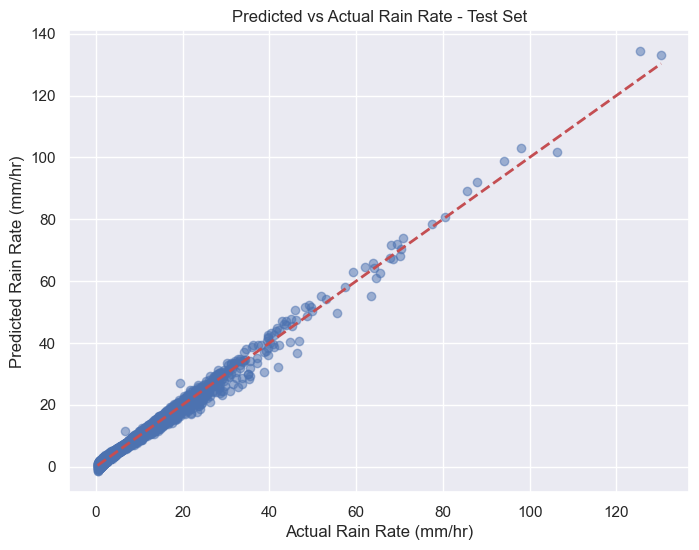

In [14]:
# Plot the predicted vs actual values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rain Rate (mm/hr)')
plt.ylabel('Predicted Rain Rate (mm/hr)')
plt.title('Predicted vs Actual Rain Rate - Test Set')   

Text(0.5, 1.0, 'Predicted vs Actual Rain Rate - Training Set')

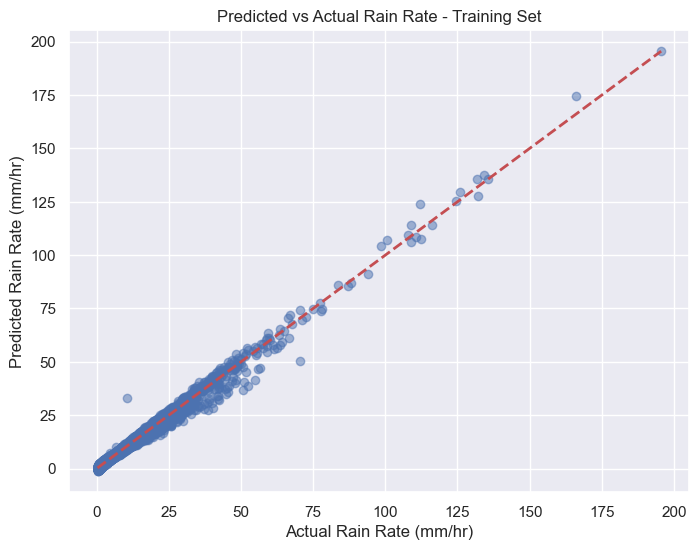

In [15]:
# Plot the predicted vs actual values for the training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Rain Rate (mm/hr)')
plt.ylabel('Predicted Rain Rate (mm/hr)')
plt.title('Predicted vs Actual Rain Rate - Training Set')   

In [16]:
radar.head()

,Zh (dBZ),Zdr (dB),Ldr (dB),Kdp (deg km-1),Ah (dBZ/km),Adr (dB/km),R (mm/hr)
0,23.144878,0.418637,-41.757733,0.005395,0.000290,0.000012,2.393520
1,22.737156,0.322850,-43.772069,0.005194,0.000360,0.000012,3.502699
2,26.869826,0.330948,-43.577399,0.013385,0.000903,0.000030,8.627561
3,28.540561,0.399480,-42.139731,0.018872,0.001036,0.000043,8.424447
4,30.500127,0.543758,-39.763087,0.027438,0.001157,0.000064,8.189291


Text(0.5, 1.0, 'Observed Horizontal Reflectivity vs Rain Rate')

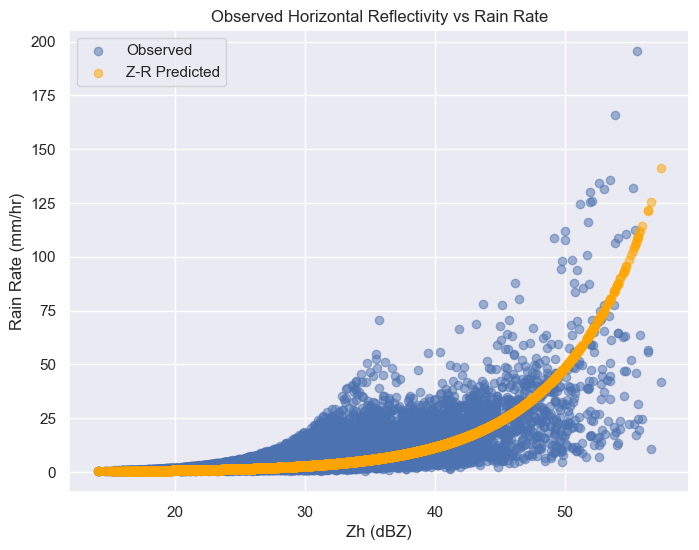

In [29]:
# First calculate Z from dBZ first
#  Z = 10^(dBZ/10)
R = radar['R (mm/hr)']
Z = 10**(radar['Zh (dBZ)']/10)
R_ZR = (Z/200)**(1/1.6)

# Plot original Z and R data along with re-calculated Z-R relationship (using Z rather than dBZ)
plt.figure(figsize=(8, 6))
plt.scatter(radar['Zh (dBZ)'], R, alpha=0.5, label='Observed')
plt.scatter(radar['Zh (dBZ)'], R_ZR, alpha=0.5, color='orange', label='Z-R Predicted')
plt.legend()
plt.xlabel('Zh (dBZ)')
plt.ylabel('Rain Rate (mm/hr)')
plt.title('Observed Horizontal Reflectivity vs Rain Rate')  


Text(0.5, 1.0, 'Predicted vs Actual Rain Rate - Z-R Relationship')

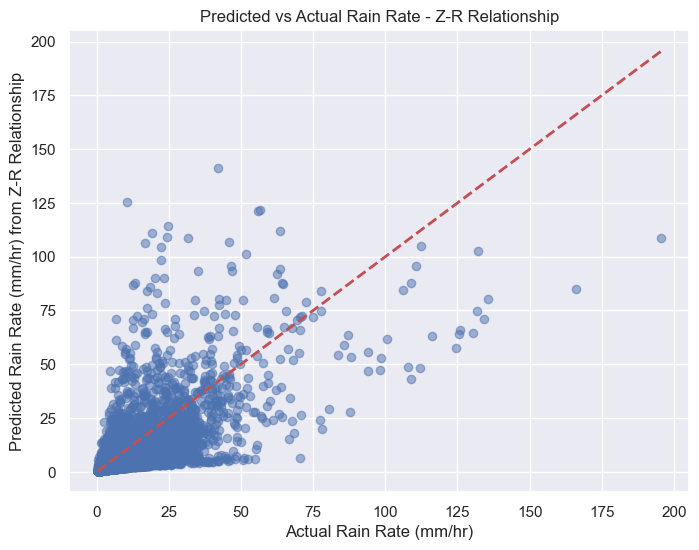

In [30]:
# Plot the Z-R predicted values vs actual values for the whole radar dataset
plt.figure(figsize=(8, 6))
plt.scatter(R, R_ZR, alpha=0.5)
plt.plot([R.min(), R.max()], [R.min(), R.max()], 'r--', lw=2)
plt.xlabel('Actual Rain Rate (mm/hr)')
plt.ylabel('Predicted Rain Rate (mm/hr) from Z-R Relationship')
plt.title('Predicted vs Actual Rain Rate - Z-R Relationship')

# The scatter/spread with increasing rain rate is what we expect based on the previous plot of the observed data vs Z-R predicted values.


In [31]:
# inspect fit metrics between Z-R predicted and actual rain rates
print("R^2 (Z-R):", r2_score(R, R_ZR))
print("RMSE (Z-R):", mean_squared_error(R, R_ZR))


R^2 (Z-R): 0.3023229070437504
RMSE (Z-R): 51.23110663345855


In [52]:
# Compare R^2 and RMSE values from Z-R relationship to those from the linear regression model

# reprint fit metrics from linear regression model
print("R^2 (lin reg train):", r2_score(y_train, y_train_pred))
print("RMSE (lin reg train):", mean_squared_error(y_train, y_train_pred))
print("R^2 (lin reg test):", r2_score(y_test, y_test_pred))
print("RMSE (lin reg test):", mean_squared_error(y_test, y_test_pred))
print("\n")

# reprint fit metrics from Z-R relationship
print("R^2 (Z-R):", r2_score(R, R_ZR))
print("RMSE (Z-R):", mean_squared_error(R, R_ZR))

R^2 (lin reg train): 0.9881371284822952
RMSE (lin reg train): 0.9050843695548824
R^2 (lin reg test): 0.9888885123534563
RMSE (lin reg test): 0.74145372703119


R^2 (Z-R): 0.3023229070437504
RMSE (Z-R): 51.23110663345855


In [ ]:
# Conclusions: 
# The linear regression model outperforms the traditional Z-R relationship in both R^2 and RMSE metrics for both training and testing datasets.

### Part 3
Repeat 1 doing a grid search over polynomial orders, using a grid search over orders 0-9, and use cross-validation of 7 folds.  For the best polynomial model in terms of $R^2$, does it outperform the baseline and the linear regression model in terms of $R^2$ and root mean square error?

In [49]:
# Set up the grid search parameters for a polynomial regression model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# Create a pipeline: polynomial features + linear regression
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', LinearRegression())
])

# Set up the parameter grid: degrees 0-9
param_grid = {'poly__degree': np.arange(10),
              'linreg__fit_intercept': [True, False]}

# Set up the grid search with a cross-validation of 7 folds
grid = GridSearchCV(pipe, param_grid, cv=7)

# Fit the grid search to the training data
grid.fit(X, y)

# Display the best parameters found by the grid search
print("Best parameters:", grid.best_params_)

Best parameters: {'linreg__fit_intercept': True, 'poly__degree': np.int64(5)}


Text(0.5, 1.0, 'Predicted vs Actual Rain Rate - Polynomial Best-Fit')

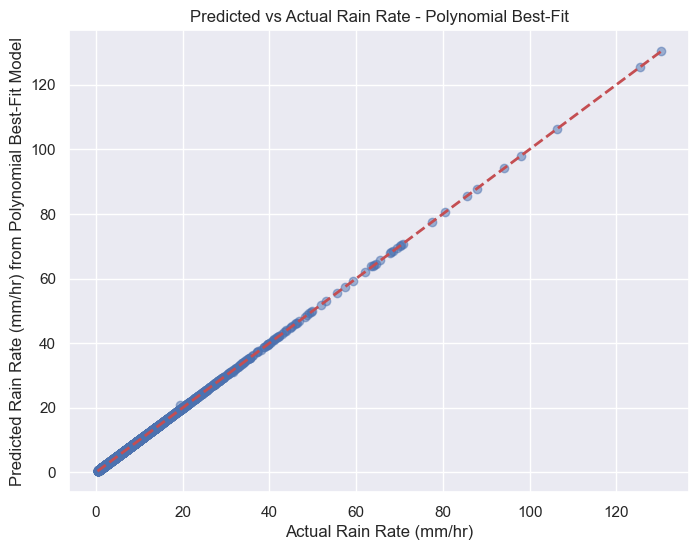

In [50]:
# Best fit model is a 5th degree polynomial with intercept included
model_poly = grid.best_estimator_
 
# Plot the best-fit predicted values of rain rate vs the actual values of rain rate
R_polybest = model_poly.fit(X_train, y_train).predict(X_test)
#  
plt.figure(figsize=(8, 6))
plt.scatter(y_test, R_polybest, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rain Rate (mm/hr)')
plt.ylabel('Predicted Rain Rate (mm/hr) from Polynomial Best-Fit Model')
plt.title('Predicted vs Actual Rain Rate - Polynomial Best-Fit')

In [51]:
print("R^2 (poly best fit):", r2_score(y_test, R_polybest))
print("RMSE (poly best fit):", mean_squared_error(y_test, R_polybest))

# That seems unrealistically good...


R^2 (poly best fit): 0.9999930531675558
RMSE (poly best fit): 0.00046355222366984935


### Part 4
Repeat 1 with a Random Forest Regressor, and perform a grid_search on the following parameters:
   
   ```python
   param_grid = {
    "bootstrap": [True, False],
    "max_depth": [10, 100],
    "max_features": ["sqrt", 1.0],  
    "min_samples_leaf": [1, 4],
    "min_samples_split": [2, 10],
    "n_estimators": [200, 1000]}
   ```
  Can you beat the baseline, or the linear regression, or best polynomial model with the best optimized Random Forest Regressor in terms of $R^2$ and root mean square error?

In [41]:
# Set up the grid search parameters for a polynomial regression model
from sklearn.ensemble import RandomForestRegressor

# Create a pipeline: polynomial features + linear regression
pipe = Pipeline([
    ('rfr', RandomForestRegressor())
])

# Set up the parameter grid: degrees 0-9
param_grid = {
    "rfr__bootstrap": [True, False],
    "rfr__max_depth": [10, 100],
    "rfr__max_features": ["sqrt", 1.0],  
    "rfr__min_samples_leaf": [1, 4],
    "rfr__min_samples_split": [2, 10],
    "rfr__n_estimators": [200, 1000]}

# Set up the grid search with a cross-validation of 7 folds
grid = GridSearchCV(pipe, param_grid, cv=7, n_jobs=-1)

# Fit the grid search to the training data
grid.fit(X, y)

# Display the best parameters found by the grid search
print("Best parameters:", grid.best_params_)

/opt/anaconda3/envs/xarray-climate/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'rfr__bootstrap': True, 'rfr__max_depth': 100, 'rfr__max_features': 1.0, 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 1000}


Text(0.5, 1.0, 'Predicted vs Actual Rain Rate - Random Forest Best-Fit')

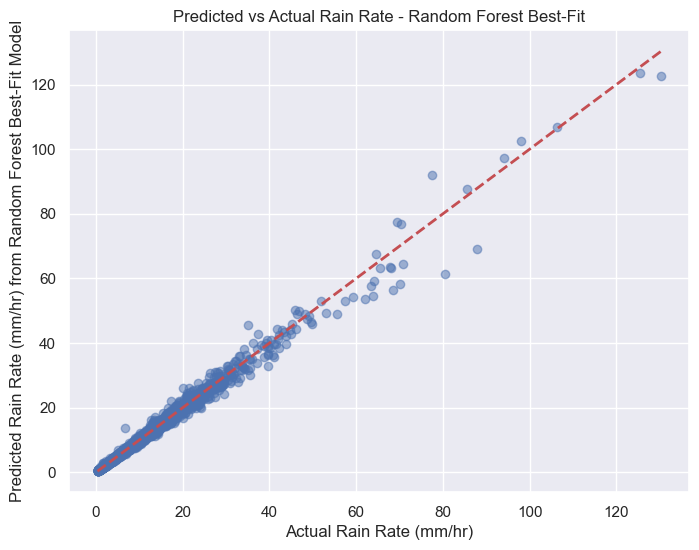

In [46]:
# Get the best fit model
model_rfr = grid.best_estimator_
 
# Plot the best-fit predicted values of rain rate vs the actual values of rain rate
R_rfrbest = model_rfr.fit(X_train, y_train).predict(X_test)
#  
plt.figure(figsize=(8, 6))
plt.scatter(y_test, R_rfrbest, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rain Rate (mm/hr)')
plt.ylabel('Predicted Rain Rate (mm/hr) from Random Forest Best-Fit Model')
plt.title('Predicted vs Actual Rain Rate - Random Forest Best-Fit')

In [47]:
print("R^2 (forest best fit):", r2_score(y_test, R_rfrbest))
print("RMSE (forest best fit):", mean_squared_error(y_test, R_rfrbest))

R^2 (forest best fit): 0.9894282792259239
RMSE (forest best fit): 0.7054358532729826


In [48]:
# Compare performance of all models

# Z-R relationship
print("R^2 (Z-R):", r2_score(R, R_ZR))
print("RMSE (Z-R):", mean_squared_error(R, R_ZR))
print("\n")

# linear regression model
print("R^2 (lin reg train):", r2_score(y_train, y_train_pred))
print("RMSE (lin reg train):", mean_squared_error(y_train, y_train_pred))
print("R^2 (lin reg test):", r2_score(y_test, y_test_pred))
print("RMSE (lin reg test):", mean_squared_error(y_test, y_test_pred))
print("\n")

# grid searched polynomial model
print("R^2 (poly best fit):", r2_score(y_test, R_polybest))
print("RMSE (poly best fit):", mean_squared_error(y_test, R_polybest))
print("\n")

# grid searched random forest model
print("R^2 (forest best fit):", r2_score(y_test, R_rfrbest))
print("RMSE (forest best fit):", mean_squared_error(y_test, R_rfrbest))
print("\n")




R^2 (Z-R): 0.3023229070437504
RMSE (Z-R): 51.23110663345855


R^2 (lin reg train): 0.9881371284822952
RMSE (lin reg train): 0.9050843695548824
R^2 (lin reg test): 0.9888885123534563
RMSE (lin reg test): 0.74145372703119


R^2 (poly best fit): 0.9999930531675558
RMSE (poly best fit): 0.00046355222366984935


R^2 (forest best fit): 0.9894282792259239
RMSE (forest best fit): 0.7054358532729826


